In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pydecomp

Consider here the Gaussian charge density:
$$
\rho = \frac{Q}{(2\pi)^{\frac{3}{2}} \sigma^3}\exp{\left(-\frac{x^2+y^2+z^2}{2\sigma^2}\right)}
$$
where $\sigma=0.05$ and $Q=27.24$ nC.
This has the exact solution of:
$$
\phi = \frac{Q}{4\pi \epsilon_0} \frac{1}{\sqrt{x^2+y^2+z^2}} erf\left(\frac{\sqrt{x^2+y^2+z^2}}{\sqrt{2}\sigma}\right)
$$

In [2]:
# Define the Cartesian grid
start = -0.125
end = 0.125
num = 100
l = np.linspace(start, end, num=num, endpoint=True)
x, y, z = np.meshgrid(l , l , l, indexing = 'ij')

# Define variables
sigma = 0.05
r = np.sqrt(x**2 + y**2 + z**2)
Q = 27.24*1e-9
eps = 8.85*1e-12

# Define the charge density
rho = ( Q / (( 2 * np.pi )**(1.5) * sigma**3 )) * np.exp(-r**2/(2*sigma**2))
phi = ( Q / (4 * np.pi * eps * r) ) * erf(r/(np.sqrt(2)*sigma))

In [3]:
potential = pydecomp.poisson(rho, np.diff(l)[0]) / (eps)

z:\home\Github\pydecomp\pydecomp.py:117: RuntimeWarning: divide by zero encountered in true_divide
  greens = 1 / ( 4 * np.pi * h * np.sqrt( x**2 + y**2 + z**2) )


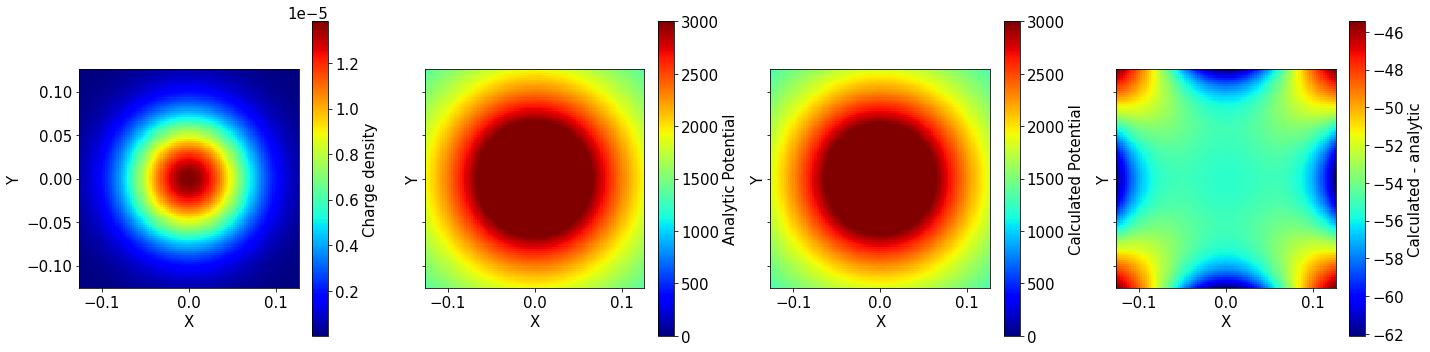

In [4]:
fs=15
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5), facecolor = 'white')
ax=axs[0]
C = rho[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=1,vmax=4)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Charge density",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[1]
C = phi[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=0,vmax=3000)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Analytic Potential",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[2]
C = potential[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=0,vmax=3000)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Calculated Potential",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)

ax=axs[3]
C = (potential-phi)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet', ) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
cbar.set_label(label=r"Calculated - analytic",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=15)


fig.tight_layout()
plt.show()

In [5]:
# Define the charge density
rho = np.exp(-r**2/(2*sigma**2))/12

Rotational = pydecomp.calc_curl(np.stack([rho*0,rho*0,rho]), dx=np.diff(l)[0], dy=np.diff(l)[0], dz=np.diff(l)[0])
Irrotational = -np.array(np.gradient(rho,np.diff(l)[0]))
tot = Irrotational + Rotational

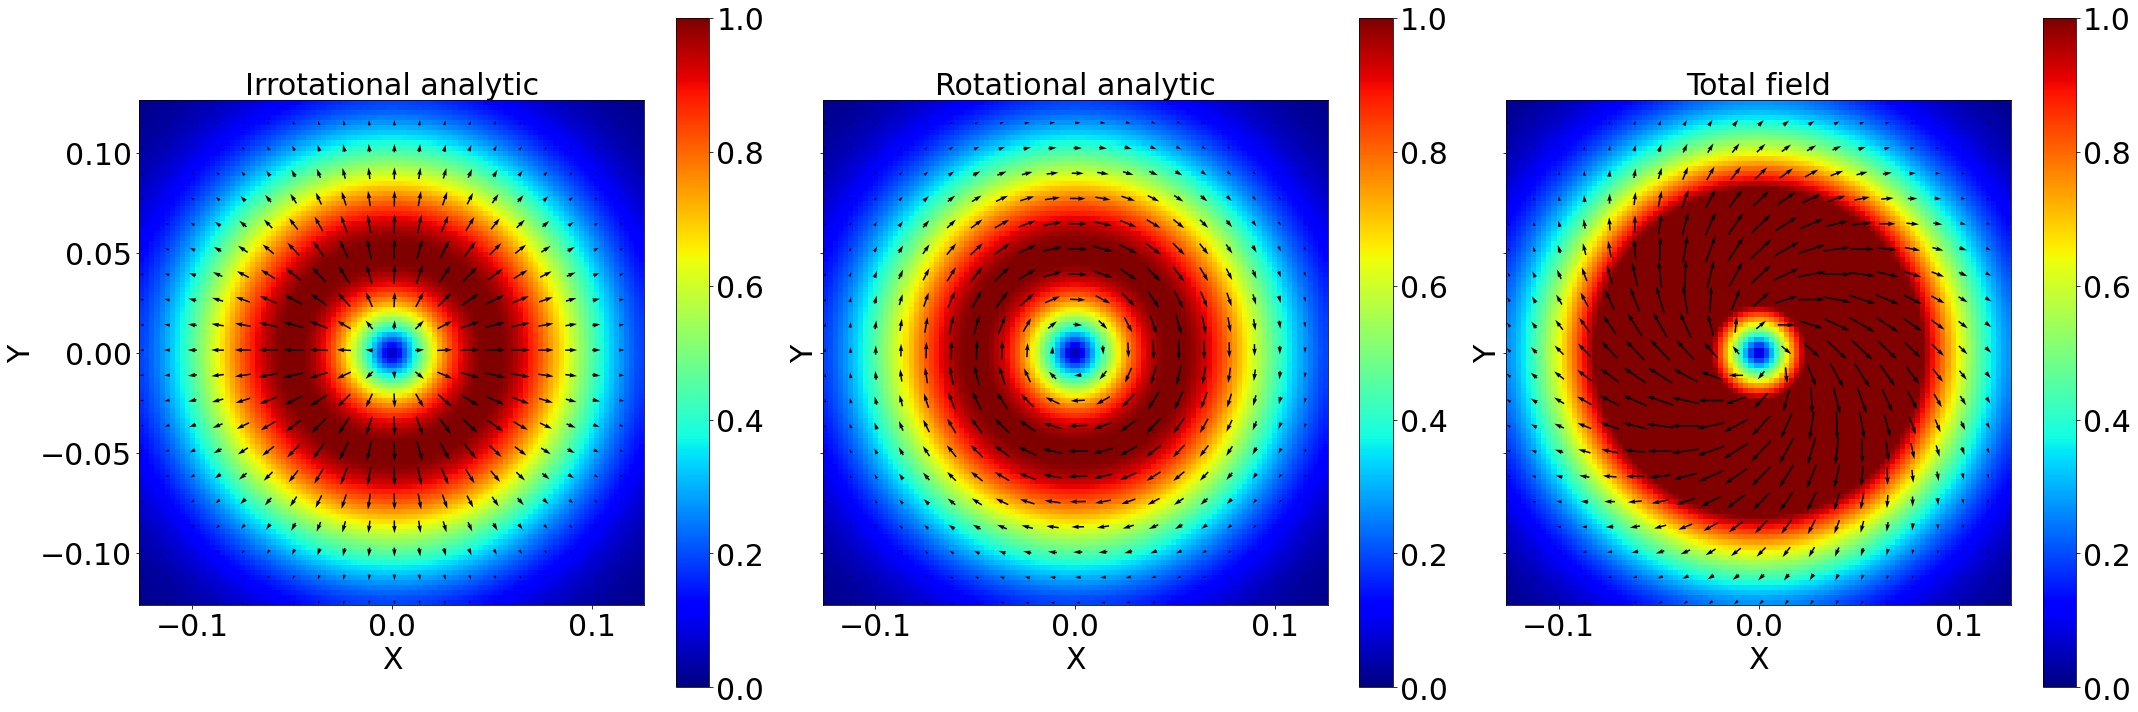

In [6]:
vmin = 0
vmax = 1
zslice = int(len(l)/2)
scale = 100

fs=30
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(30, 10), facecolor = 'white')
ax=axs[0]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = Irrotational[0,:,:,:] # X-component of arrow direction
Vquiv = Irrotational[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(Irrotational,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Irrotational analytic', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[1]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = Rotational[0,:,:,:] # X-component of arrow direction
Vquiv = Rotational[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(Rotational,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Rotational analytic', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[2]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = tot[0,:,:,:] # X-component of arrow direction
Vquiv = tot[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(tot,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Total field', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)


fig.tight_layout()
plt.show()

In [7]:
v_field = tot
h = np.diff(l)[0]

# Find the scalar potential
div = pydecomp.calc_divergence(v_field, dx=h, dy=h, dz=h)

div[0,:,:] = 0; div[-1,:,:] = 0
div[:,0,:] = 0; div[:,-1,:] = 0
div[:,:,0] = 0; div[:,:,-1] = 0

# Find the scalar potential
scalpot_volume = pydecomp.poisson(div, h)

scalpot_surface = pydecomp.surface_contribution_scalar(v_field, h)

scalpot =  scalpot_volume - scalpot_surface

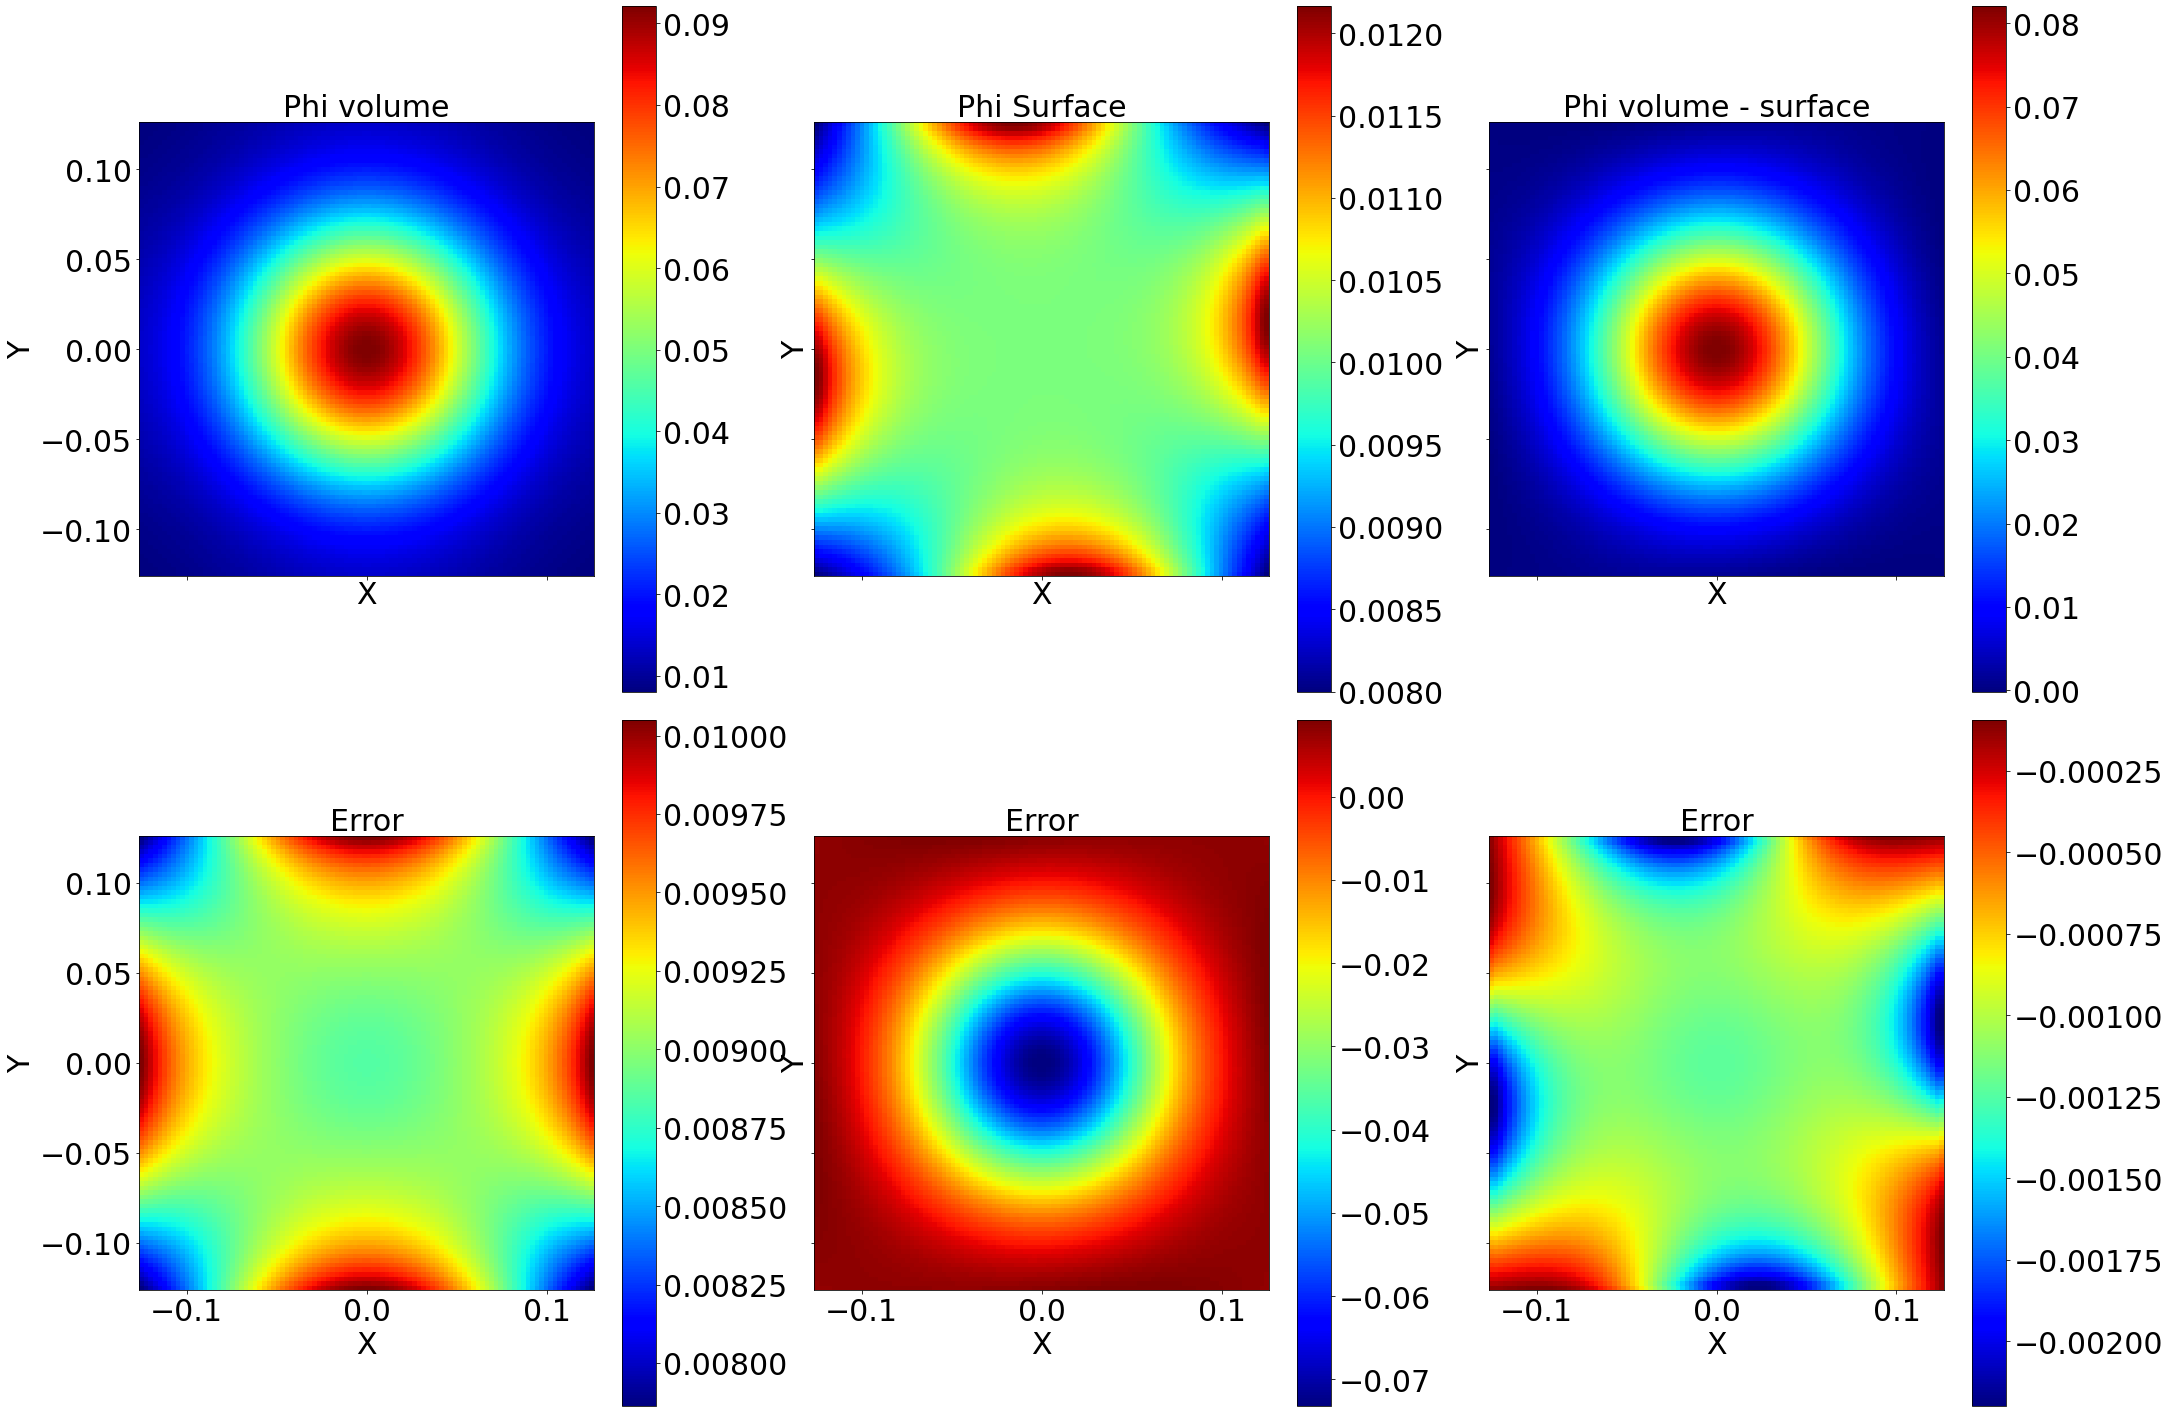

In [8]:
vmin = 0
vmax = 1
zslice = int(len(l)/2)

fs=30
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(30, 20), facecolor = 'white')
axs=axs.flatten()
ax=axs[0]

C = (scalpot_volume)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Phi volume', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[1]

C = (scalpot_surface)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Phi Surface', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[2]

C = (scalpot)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Phi volume - surface', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

vmin = 0
vmax = 10

ax=axs[3]

C = (((scalpot_volume-rho)))[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',)#vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[4]

C = ((scalpot_surface-rho))[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',)#vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[5]

C = (((scalpot-rho)))[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet')#,vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

fig.tight_layout()
plt.show()

In [9]:
calc_irr = pydecomp.Helmholtz_Decomp_Poisson_irrotational(tot, h)
calc_rot = pydecomp.Helmholtz_Decomp_Poisson_rotational(tot, h)
calc_tot = calc_rot + calc_irr

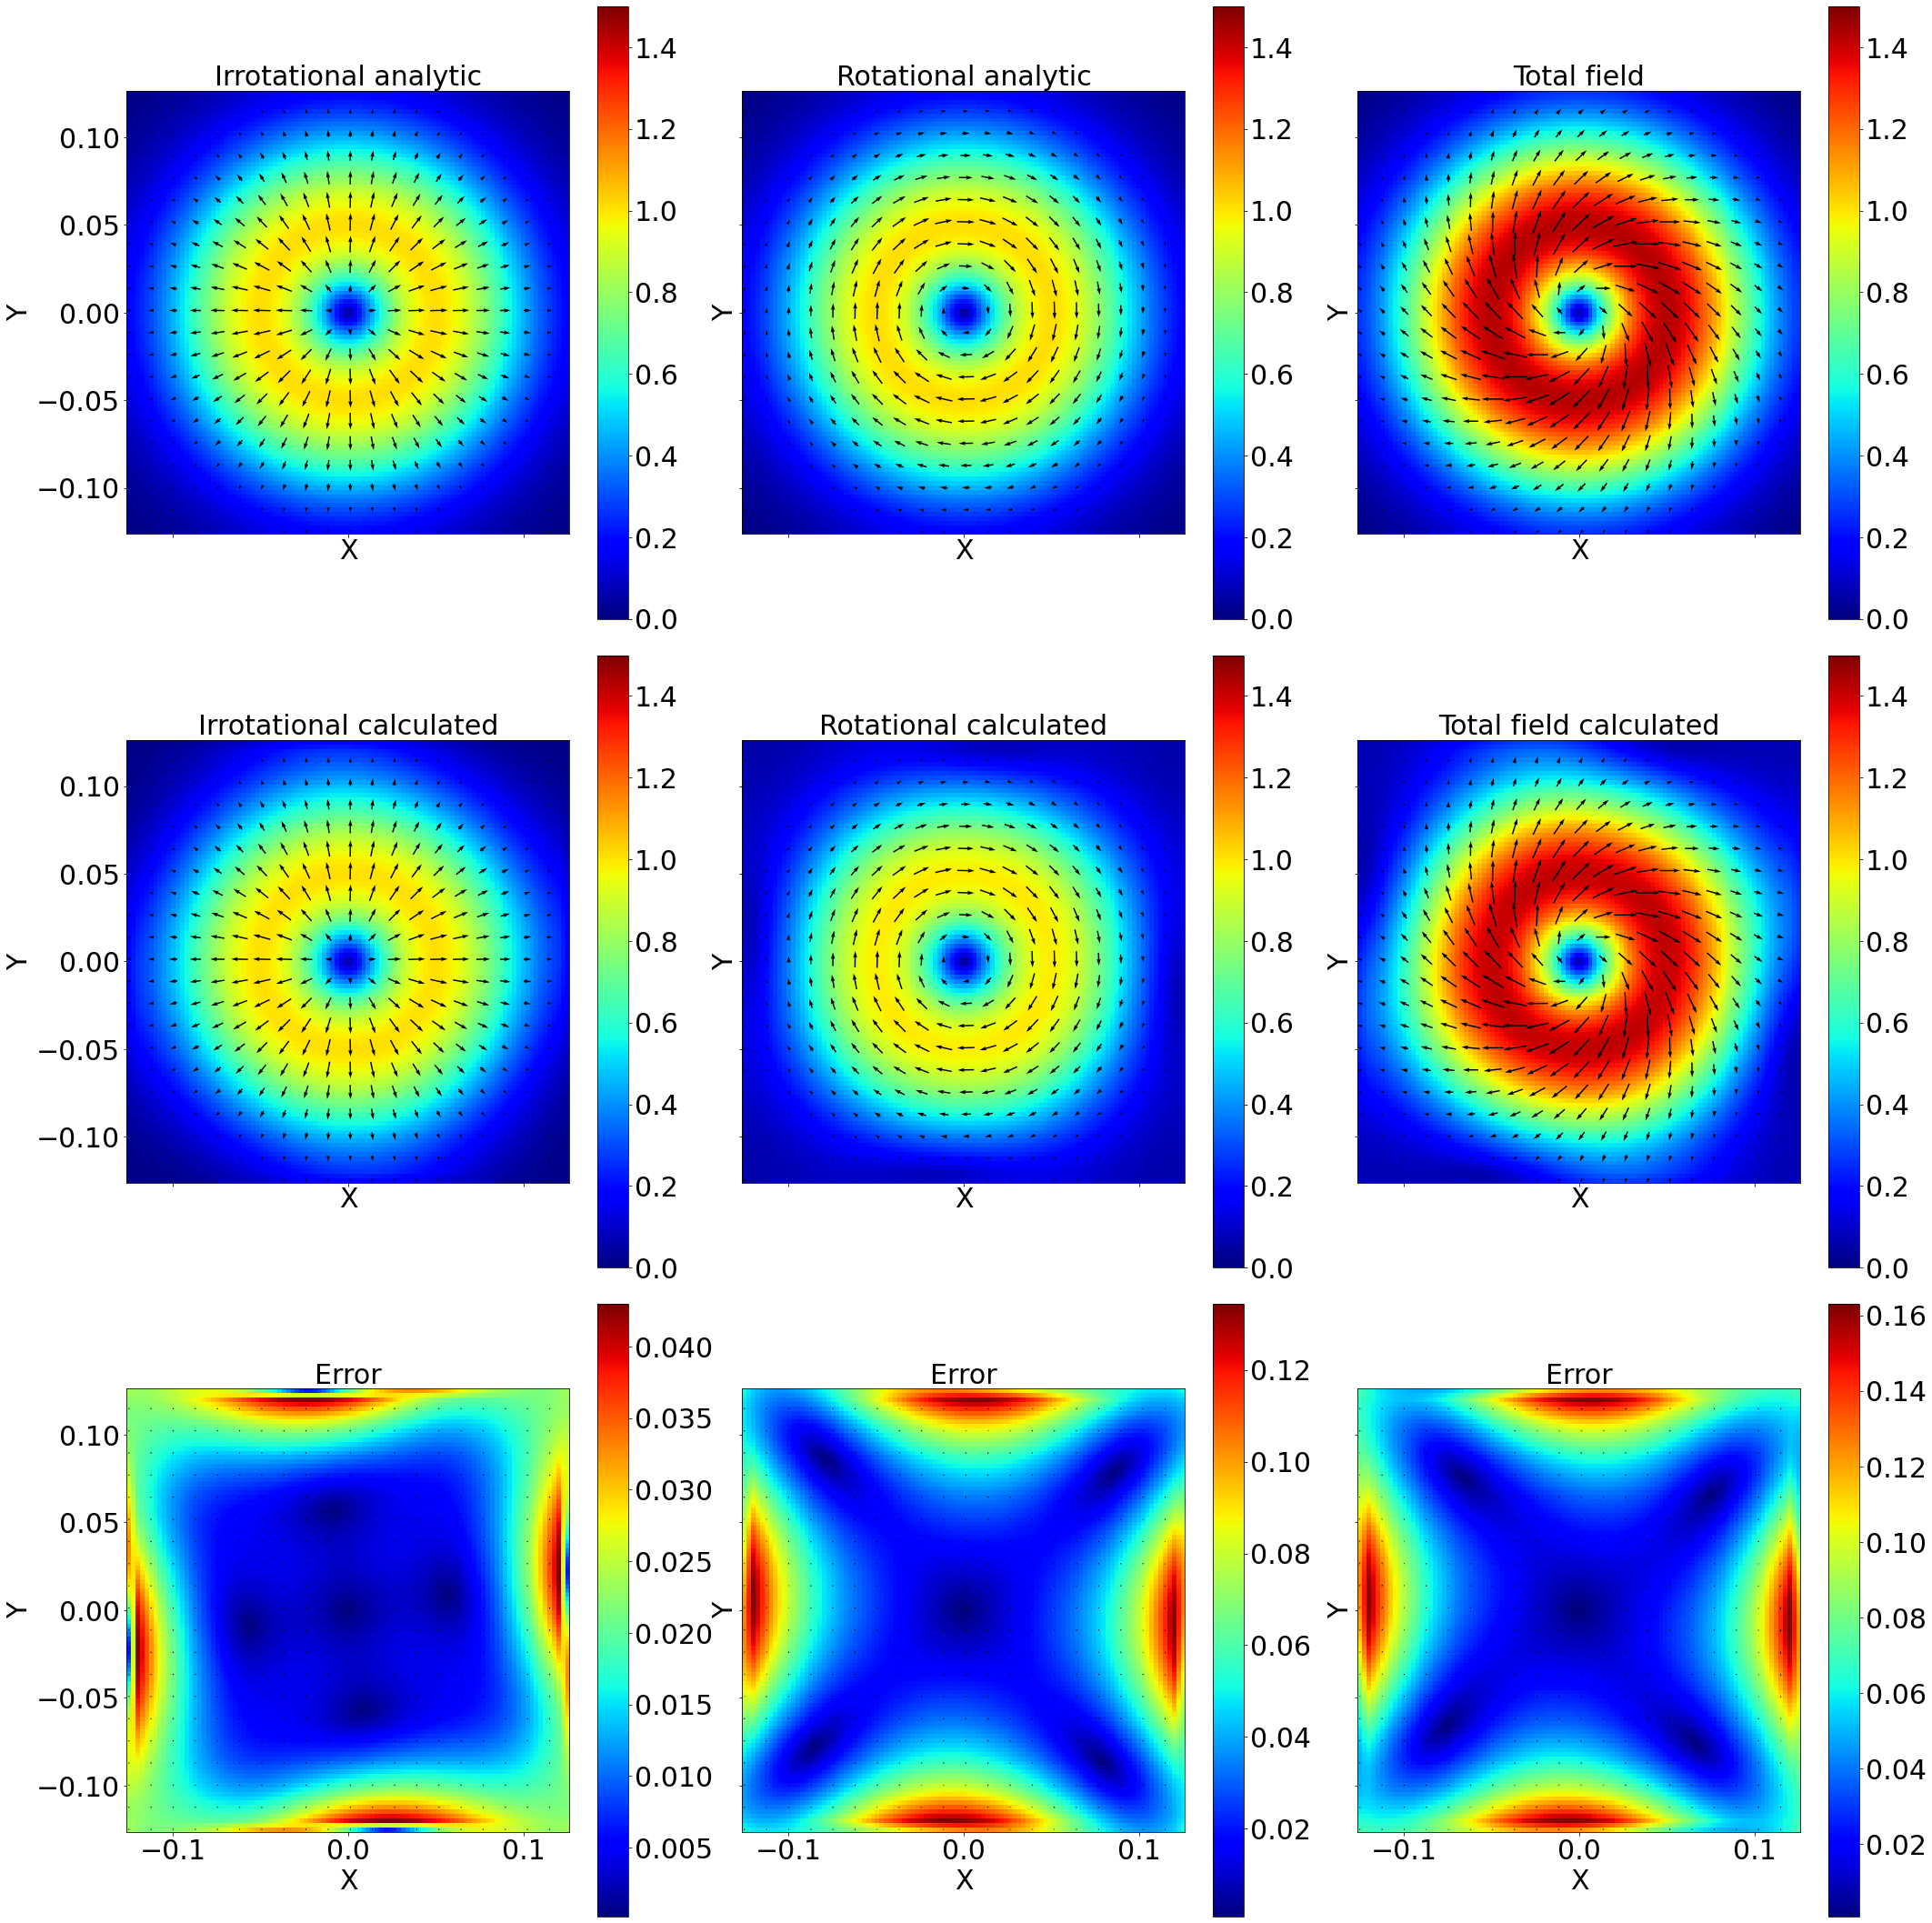

In [10]:
vmin = 0
vmax = 1.5
zslice = int(len(l)/2)
scale = 100

fs=30
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(30, 30), facecolor = 'white')
axs = axs.flatten()
ax=axs[0]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = Irrotational[0,:,:,:] # X-component of arrow direction
Vquiv = Irrotational[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(Irrotational,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Irrotational analytic', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[1]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = Rotational[0,:,:,:] # X-component of arrow direction
Vquiv = Rotational[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(Rotational,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Rotational analytic', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[2]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = tot[0,:,:,:] # X-component of arrow direction
Vquiv = tot[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(tot,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Total field', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[3]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = calc_irr[0,:,:,:] # X-component of arrow direction
Vquiv = calc_irr[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(calc_irr,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Irrotational calculated', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[4]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = calc_rot[0,:,:,:] # X-component of arrow direction
Vquiv = calc_rot[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(calc_rot,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Rotational calculated', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[5]

" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = calc_tot[0,:,:,:] # X-component of arrow direction
Vquiv = calc_tot[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(calc_tot,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',vmin=vmin, vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential y",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Total field calculated', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[6]
v = (calc_irr-Irrotational)
" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = v[0,:,:,:] # X-component of arrow direction
Vquiv = v[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(v,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',)#vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[7]
v = (calc_rot-Rotational)
" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = v[0,:,:,:] # X-component of arrow direction
Vquiv = v[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(v,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',)#vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

ax=axs[8]
v = (calc_tot-tot)
" Make a quiver plot "
xstep = 5
ystep = 5
Xquiv = x[:]
Yquiv = y[:]
Uquiv = v[0,:,:,:] # X-component of arrow direction
Vquiv = v[1,:,:,:] # Y-component of arrow direction
Xquiv = Xquiv[::ystep,::xstep,zslice]
Yquiv = Yquiv[::ystep,::xstep,zslice]
Uquiv = Uquiv[::ystep,::xstep,zslice]
Vquiv = Vquiv[::ystep,::xstep,zslice]

C = np.linalg.norm(v,axis=0)[:,:,int(len(l)/2)] # colour values for colormesh function
img = ax.pcolormesh(x[:,:,int(len(l)/2)],y[:,:,int(len(l)/2)], C ,cmap = 'jet',)#vmin=vmin,vmax=vmax)#, cmap = 'seismic_r', vmin=-5e-25,vmax=5e-25) # Plot the colormesh
ax.quiver(Xquiv, Yquiv, Uquiv, Vquiv, units='xy', pivot='middle',  scale = scale)
cbar = fig.colorbar(img, ax=ax, shrink=1.0, anchor = (0.0,0.0))
# cbar.set_label(label=r"Vector Potential x",size=fs)
cbar.ax.tick_params(labelsize=fs)
cbar.ax.yaxis.get_offset_text().set(size=fs)
ax.set_xlabel(r"X", fontsize=fs)
ax.set_ylabel(r"Y", fontsize=fs)
ax.set_title('Error', fontsize=fs)
ax.set(aspect=1)
ax.tick_params(labelsize=fs)

fig.tight_layout()
plt.show()